In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
#defining path
path = r'C:\Users\gullo\OneDrive\Desktop\Career_Foundry\Data Immersion'


In [3]:
#3 import customers
df = pd.read_csv(os.path.join(path, 'A6- Advanced Analytics & Dashboard Design', 'Data', 'zomato_dirty.csv'), encoding='latin-1')

In [4]:
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape


(51717, 17)

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
# dropping irrelevent rows url,address,phone,menu_item,dish_liked,reviews_list)
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43873 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              47356 non-null  object
 10  listed_in(city)              47356 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [9]:
# removing duplicates
df.drop_duplicates(inplace = True)
df.shape

(49853, 11)

## cleaning rate column


In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## creating a function to replace 'New' and 'nan' to null value and removing '/5' 

In [11]:
def handlerate(value):
    if(value=='NEW'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [12]:
# checking null values
df.rate.isnull().sum()

10013

## Filling Null Values in Rate Column with Mean

In [13]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49853 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         49853 non-null  object 
 1   online_order                 49853 non-null  object 
 2   book_table                   49853 non-null  object 
 3   rate                         49853 non-null  float64
 4   votes                        49853 non-null  int64  
 5   location                     49832 non-null  object 
 6   rest_type                    49630 non-null  object 
 7   cuisines                     49808 non-null  object 
 8   approx_cost(for two people)  49520 non-null  object 
 9   listed_in(type)              47269 non-null  object 
 10  listed_in(city)              47269 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB


## Dropping Null Values

In [15]:
df.dropna(inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## Renaming Column Names

In [16]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [17]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Jayanagar', 'Uttarahalli', 'JP Nagar', 'South Bangalore',
       'City Market', 'Nagarbhavi', 'Bannerghatta Road', 'BTM',
       'Kanakapura Road', 'Bommanahalli', 'CV Raman Nagar',
       'Electronic City', 'HSR', 'Marathahalli', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Koramangala 8th Block',
       'Richmond Road', 'Koramangala 7th Block', 'Jalahalli',
       'Koramangala 4th Block', 'Bellandur', 'Sarjapur Road',
       'Whitefield', 'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Ulsoor', 'Lavelle Road', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'Cunningham Road',
       'Race Course Road', 'Church Street', 'Commercial Street',
       'St. Marks Road', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeeva

In [18]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

## 'Listed_in(city)' and 'location' columns has simiolar names so getting rid of 'listed_in(city)' column

In [19]:
df = df.drop(['listed_in(city)'], axis = 1)

In [20]:
df['Cost2plates'].unique()

array(['800', '300', '600', '550', '500', '450', '650', '700', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '3,000', '2,800', '3,400', '40', '2,100', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '2,700', '4,500', '140', '1,650'], dtype=object)

## Removing , from Cost2Plates Column to replace values to float

In [21]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
df['Cost2plates'] = df['Cost2plates'].apply(handlecomma)
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  550.,  500.,  450.,  650.,  700.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 3000., 2800., 3400.,   40.,
       2100., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 2700., 4500.,  140., 1650.])

In [22]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


## Cleaning Rest Type Column

In [23]:
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

Quick Bites                   18458
Casual Dining                  9070
Cafe                           3135
Delivery                       2461
Dessert Parlor                 2157
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Casual Dining, Irani Cafee        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

## Creating Clusters



In [39]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

Beverage Shop                 862
Casual Dining, Bar            787
Bar                           625
Food Court                    585
Sweet Shop                    460
                             ... 
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Casual Dining, Irani Cafee      2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: rest_type, Length: 86, dtype: int64

## Making Rest Types less than 1000 in frequency as 'others'

In [40]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
        
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

Quick Bites           18458
Casual Dining          9070
others                 8394
Cafe                   3135
Delivery               2461
Dessert Parlor         2157
Takeaway, Delivery     1941
Bakery                 1127
Name: rest_type, dtype: int64

## Cleaning Location Column

In [48]:
df['location'].value_counts(ascending  = False)

BTM                      4885
HSR                      2314
JP Nagar                 2060
Koramangala 5th Block    1973
Whitefield               1935
                         ... 
West Bangalore              5
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

## Creating clusters for locations which has less than 300 restaurants as 'Others'

In [49]:
location = df['location'].value_counts(ascending  = False)

location_lessthan300 = location[location<300]

In [50]:
def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

others                   5010
BTM                      4885
HSR                      2314
JP Nagar                 2060
Koramangala 5th Block    1973
Whitefield               1935
Jayanagar                1787
Indiranagar              1724
Marathahalli             1667
Bannerghatta Road        1514
Electronic City          1205
Bellandur                1179
Koramangala 1st Block    1149
Brigade Road             1066
Koramangala 7th Block    1064
Koramangala 6th Block     981
Ulsoor                    953
Sarjapur Road             946
Banashankari              874
Koramangala 4th Block     852
Richmond Road             756
Kalyan Nagar              756
MG Road                   739
Basavanagudi              674
Frazer Town               660
Malleshwaram              653
Brookefield               613
Kammanahalli              610
Banaswadi                 602
New BEL Road              591
Residency Road            588
Rajajinagar               562
Shivajinagar              487
Domlur    

## Cleaning Cuisines Column

In [51]:
df.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [52]:
df['cuisines'].value_counts(ascending  = False)

North Indian                                                                    2651
North Indian, Chinese                                                           2211
South Indian                                                                    1775
Biryani                                                                          880
Bakery, Desserts                                                                 870
                                                                                ... 
Pizza, North Indian, Modern Indian                                                 1
North Indian, South Indian, Kerala, Chinese                                        1
North Indian, Chinese, South Indian, Mughlai                                       1
Continental, Italian, North Indian, Mexican                                        1
Continental, Mediterranean, Italian, North Indian, Finger Food, Asian, Momos       1
Name: cuisines, Length: 2623, dtype: int64

In [53]:
cuisines = df['cuisines'].value_counts(ascending  = False)


## Creating clusters for cuisines which has less than 100 cuisines as 'Others'

In [54]:
cuisines_lessthan100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

others                                 23165
North Indian                            2651
North Indian, Chinese                   2211
South Indian                            1775
Biryani                                  880
                                       ...  
Cafe, Bakery                             108
Chinese, Thai, Momos                     106
South Indian, Chinese, North Indian      105
North Indian, Chinese, Continental       105
North Indian, Chinese, Seafood           101
Name: cuisines, Length: 67, dtype: int64

In [55]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


## Keeping the 'Type' column as is

In [56]:
df['Type'].value_counts()

Delivery              23973
Dine-out              16055
Desserts               3346
Cafes                  1441
Drinks & nightlife      740
Buffet                  682
Pubs and bars           506
Name: Type, dtype: int64

In [ ]:
# Export final df_ords 

df.to_csv(os.path.join(path, 'A6- Advanced Analytics & Dashboard Design', 'Data', 'zomato_clean1.csv'), encoding='latin-1')

# Data is Clean, Lets jump to Visualization

## Visualizing Online Order

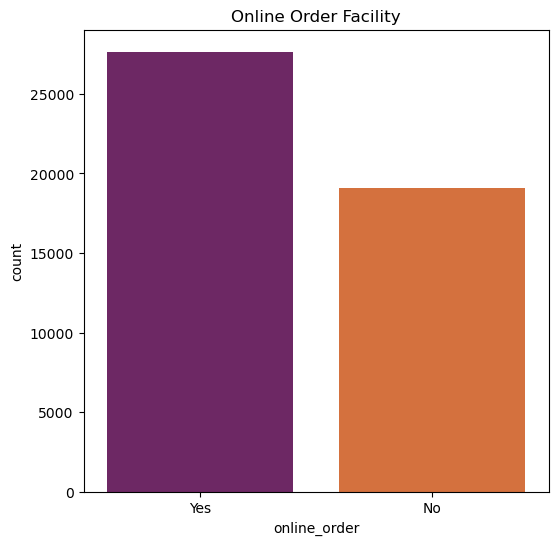

In [69]:

# Plot the countplot with specific order for 'online_order' categories
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='online_order', order=['Yes', 'No'], palette='inferno')
plt.title('Online Order Facility')
file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'online_order_countplot.png')
                         
plt.savefig(file_path)
plt.show()


## Visualizing Book Table

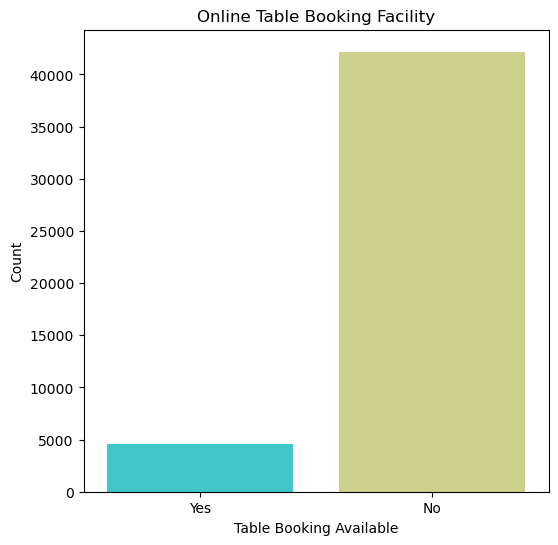

In [73]:
# Plot the countplot using the 'book_table' column directly
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='book_table', palette='rainbow', order=['Yes', 'No'])
plt.title('Online Table Booking Facility')
plt.xlabel('Table Booking Available')
plt.ylabel('Count')

file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'table_book_facility.png')
                         
plt.savefig(file_path)
plt.show()

## Visualizing Online Order vs Rate

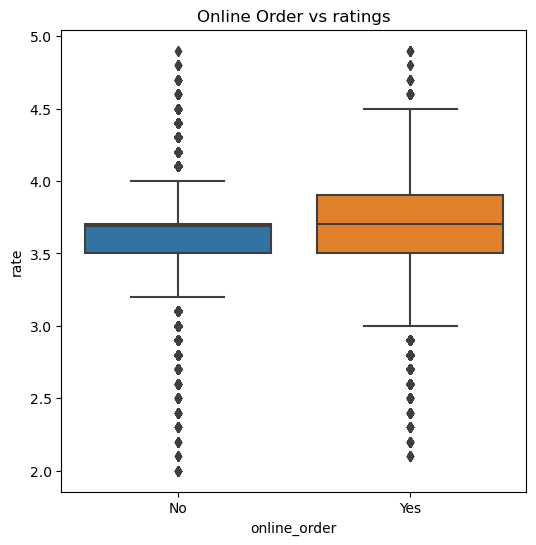

In [75]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)
plt.title('Online Order vs ratings')

file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'online_order_vs_rating.png')
                         
plt.savefig(file_path)


## Visualizing Book Table vs Rate

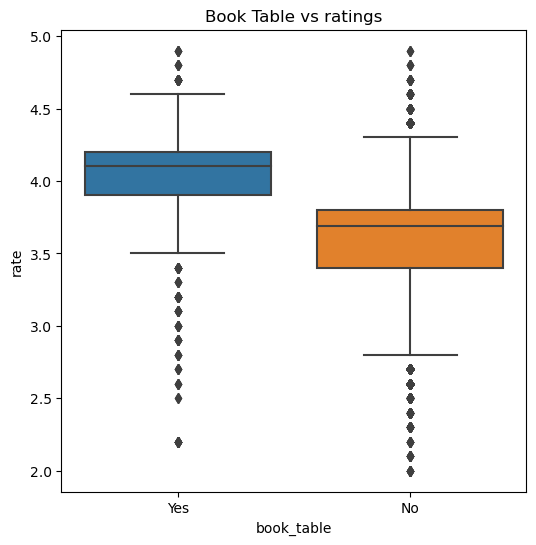

In [77]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)
plt.title('Book Table vs ratings')

file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'book_table_vs_rating.png')
                         
plt.savefig(file_path)

## Visualizing Online Order Facility By Location

In [78]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1722  3163
Banashankari            391   483
Banaswadi               287   315
Bannerghatta Road       653   861
Basavanagudi            241   433
Bellandur               483   696
Brigade Road            473   593
Brookefield             222   391
Church Street           139   232
Commercial Street       225   133
Cunningham Road         163   275
Domlur                  240   224
Ejipura                 214   212
Electronic City         661   544
Frazer Town             279   381
HSR                     545  1769
Indiranagar             597  1127
JP Nagar                832  1228
Jayanagar               525  1262
Kalyan Nagar            313   443
Kammanahalli            258   352
Koramangala 1st Block   370   779
Koramangala 4th Block   366   486
Koramangala 5th Block   651  1322
Koramangala 6th Block   373   608
Koramangala 7th Block   349   715
Lavelle Road            240   135
MG Road                 433   306
Malleshwaram            282   371
Marathahalli            641  1026
New BEL Road            235   356
Old Airport Road        211   208
Rajajinagar             278   284
Residency Road          358   230
Richmond Road           525   231
Sarjapur Road           293   653
Shanti Nagar            275   188
Shivajinagar            344   143
Ulsoor                  369   584
Whitefield              923  1012
others                 2101  2909

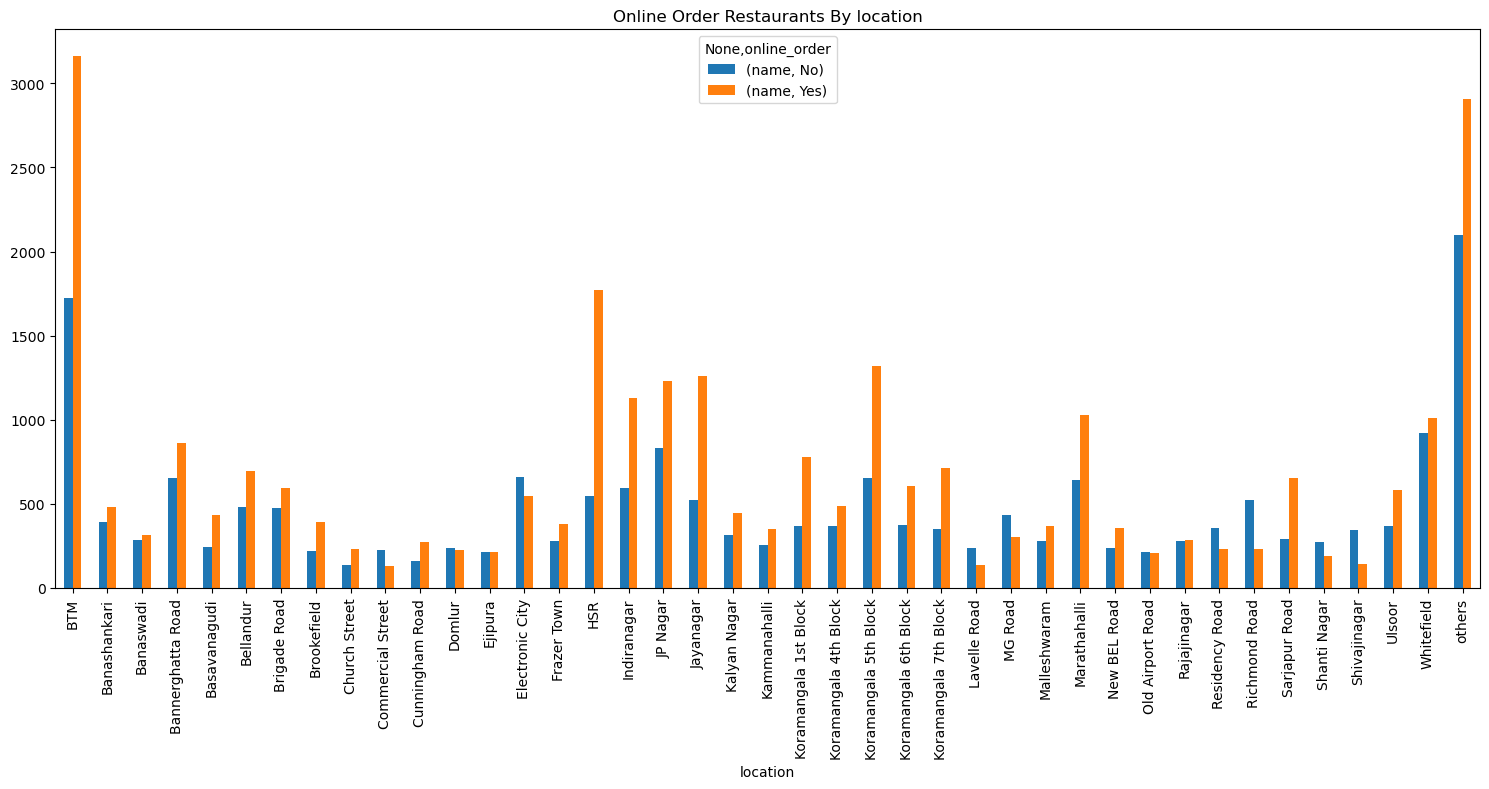

In [83]:
df1.plot(kind = 'bar', figsize = (15,8))
plt.title('Online Order Restaurants By location')

# Increase the bottom margin to make room for the x-axis labels
plt.subplots_adjust(bottom=0.2)

# Call tight_layout to ensure all elements fit within the figure area
plt.tight_layout() 

file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'online_order_by_location.png')
                         
plt.savefig(file_path)



##  Visualizing Book Table Facility By Location


In [81]:
df2 = df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    4740  145
Banashankari            816   58
Banaswadi               594    8
Bannerghatta Road      1442   72
Basavanagudi            658   16
Bellandur              1099   80
Brigade Road            955  111
Brookefield             555   58
Church Street           252  119
Commercial Street       358    0
Cunningham Road         307  131
Domlur                  411   53
Ejipura                 426    0
Electronic City        1122   83
Frazer Town             656    4
HSR                    2159  155
Indiranagar            1411  313
JP Nagar               1814  246
Jayanagar              1555  232
Kalyan Nagar            644  112
Kammanahalli            570   40
Koramangala 1st Block  1123   26
Koramangala 4th Block   649  203
Koramangala 5th Block  1610  363
Koramangala 6th Block   903   78
Koramangala 7th Block   954  110
Lavelle Road            228  147
MG Road                 494  245
Malleshwaram            590   63
Marathahalli           1562  105
New BEL Road            555   36
Old Airport Road        366   53
Rajajinagar             532   30
Residency Road          475  113
Richmond Road           657   99
Sarjapur Road           851   95
Shanti Nagar            423   40
Shivajinagar            464   23
Ulsoor                  791  162
Whitefield             1766  169
others                 4643  367

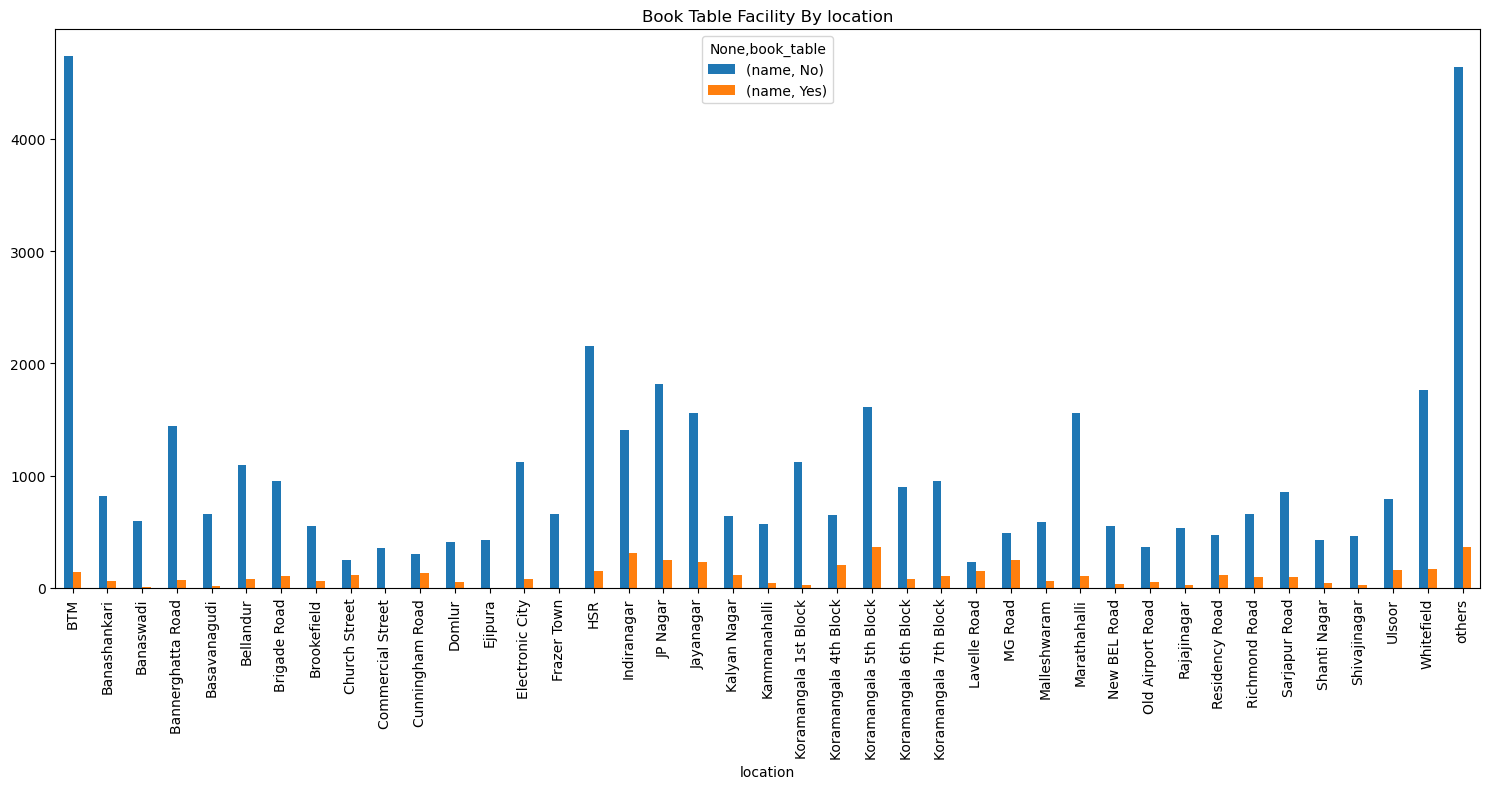

In [84]:
df2.plot(kind = 'bar', figsize = (15,8))
plt.title('Book Table Facility By location')

# Increase the bottom margin to make room for the x-axis labels
plt.subplots_adjust(bottom=0.2)

# Call tight_layout to ensure all elements fit within the figure area
plt.tight_layout() 

file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'book_table_facility_by_location.png')
                         
plt.savefig(file_path)

## Visualizing Types of Restaurents By Ratings

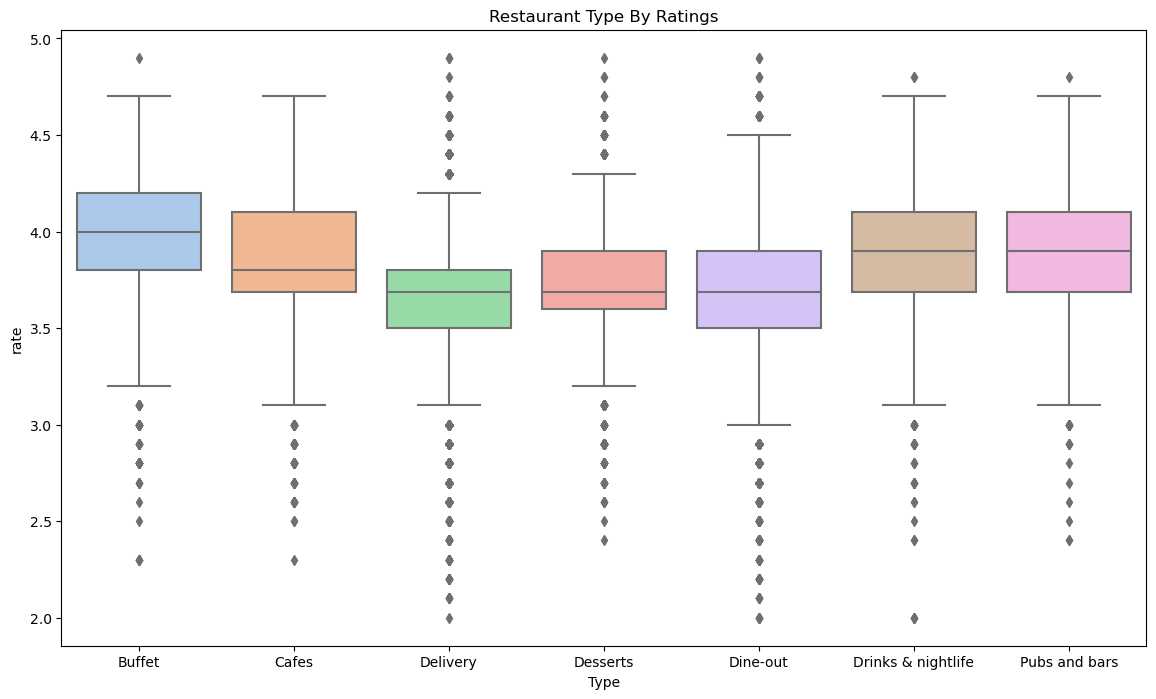

In [87]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = df, palette = 'pastel')
plt.title('Restaurant Type By Ratings')

file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'restaurant_type_by_ratings.png')
                         
plt.savefig(file_path)

##  Grouping Types of Restaurents By Location


In [88]:
df3 = df.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       17    79     2950      194     1605   
Banashankari               7    35      399       71      348   
Banaswadi                  0    23      296       37      239   
Bannerghatta Road          6    43      777      137      543   
Basavanagudi               7    10      341       66      245   
Bellandur                 23    34      580       70      443   
Brigade Road              25    40      456       95      407   
Brookefield                3    15      322       44      227   
Church Street              7    20      138       24      142   
Commercial Street          0    13      114       74      157   
Cunningham Road           29    28      178       20      168   
Domlur                    15    13      251       35      128   
Ejipura                    0     0      239       16      171   
Electronic City           20    20      554       70      501   
Frazer Town                1    11      433       52      159   
HSR                       15    37     1592      113      541   
Indiranagar               22    75      972      120      448   
JP Nagar                  38    72     1104      161      650   
Jayanagar                 23    65      970      177      540   
Kalyan Nagar               8    37      338       81      278   
Kammanahalli               2    25      316       35      228   
Koramangala 1st Block      3    19      672       66      369   
Koramangala 4th Block     17    37      414       70      246   
Koramangala 5th Block     40   102      918      175      670   
Koramangala 6th Block     16    36      454       57      359   
Koramangala 7th Block     19    52      469      124      371   
Lavelle Road              17    24       99       47      130   
MG Road                   38    62      230       64      283   
Malleshwaram               8    31      250       82      258   
Marathahalli              21    28      930      102      574   
New BEL Road               3    25      317       31      206   
Old Airport Road          10     5      195       34      159   
Rajajinagar               10     4      248       55      239   
Residency Road            20    31      166       51      254   
Richmond Road             53    14      249       76      336   
Sarjapur Road             15    20      518       80      294   
Shanti Nagar               9    22      179       34      213   
Shivajinagar               6    17      138       36      275   
Ulsoor                    14    50      437       61      342   
Whitefield                22    41      978      129      711   
others                    73   126     2792      280     1598   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   21            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      6             2  
Basavanagudi                           5             0  
Bellandur                             15            14  
Brigade Road                          30            13  
Brookefield                            2             0  
Church Street                         23            17  
Commercial Street                      0             0  
Cunningham Road                       11             4  
Domlur                                12            10  
Ejipura                                0             0  
Electronic City                       20            20  
Frazer Town                            2             2  
HSR                                    5            11  
Indiranagar                           45            42  
JP Nagar               

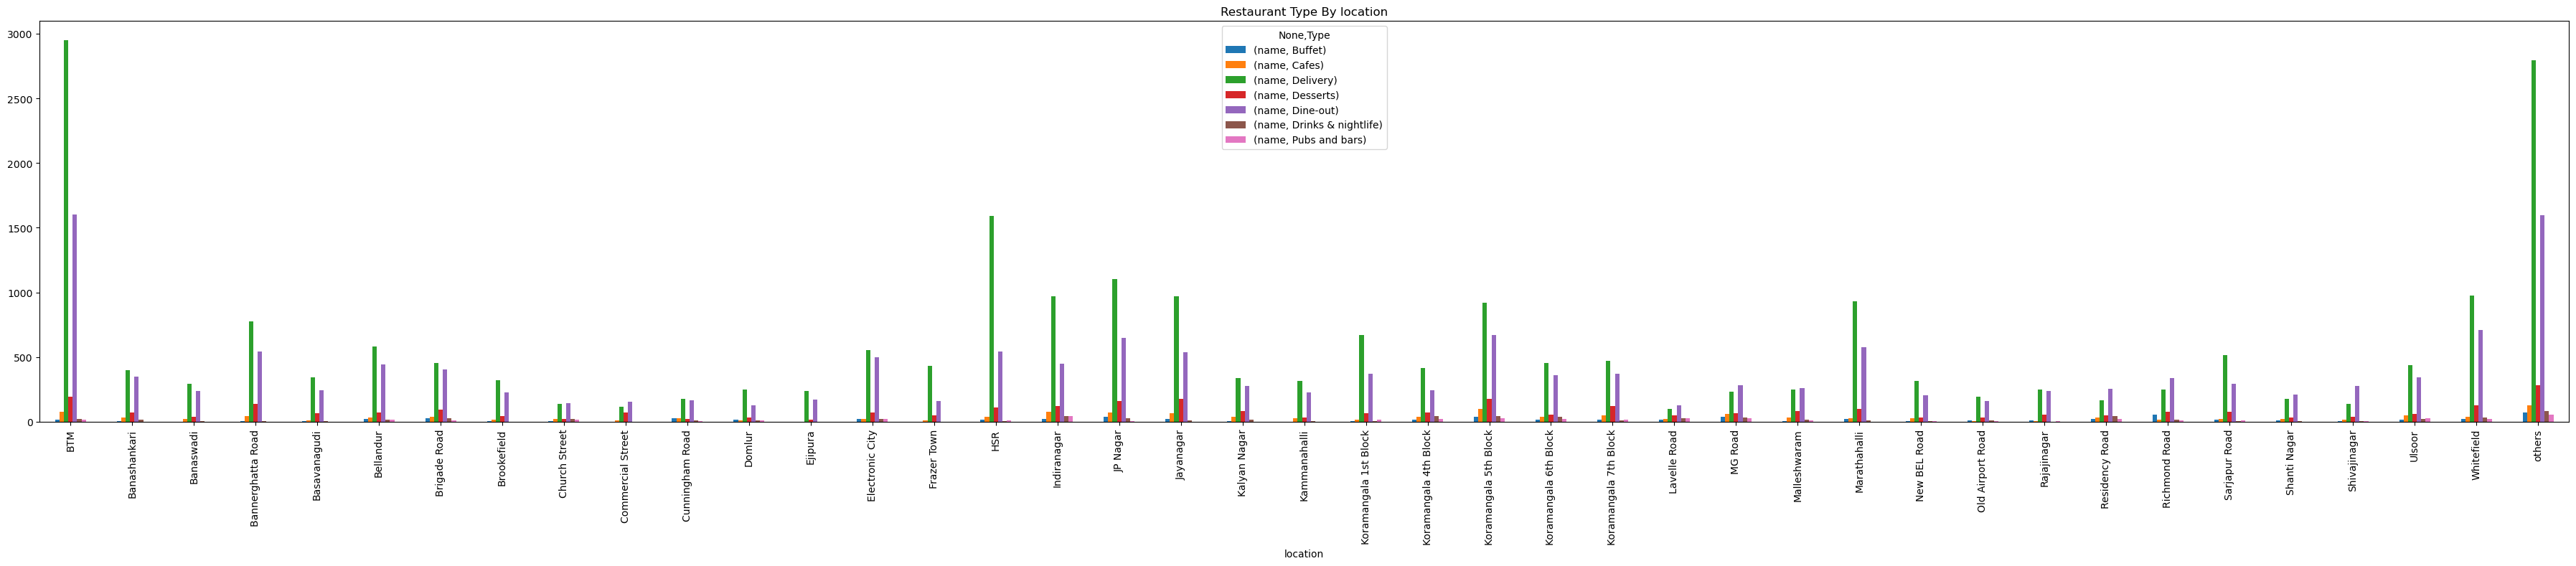

In [94]:
df3.plot(kind = 'bar', figsize = (36,8))
plt.title('Restaurant Type By location')

# Increase the bottom margin to make room for the x-axis labels
plt.subplots_adjust(bottom=0.2)

# Call tight_layout to ensure all elements fit within the figure area
plt.tight_layout() 

file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'restaurant_type_by_location.png')
                         
plt.savefig(file_path)

## Number of Votes/Ratings By Location 

In [95]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,946660
Indiranagar,623080
others,573739
BTM,474484
JP Nagar,416814


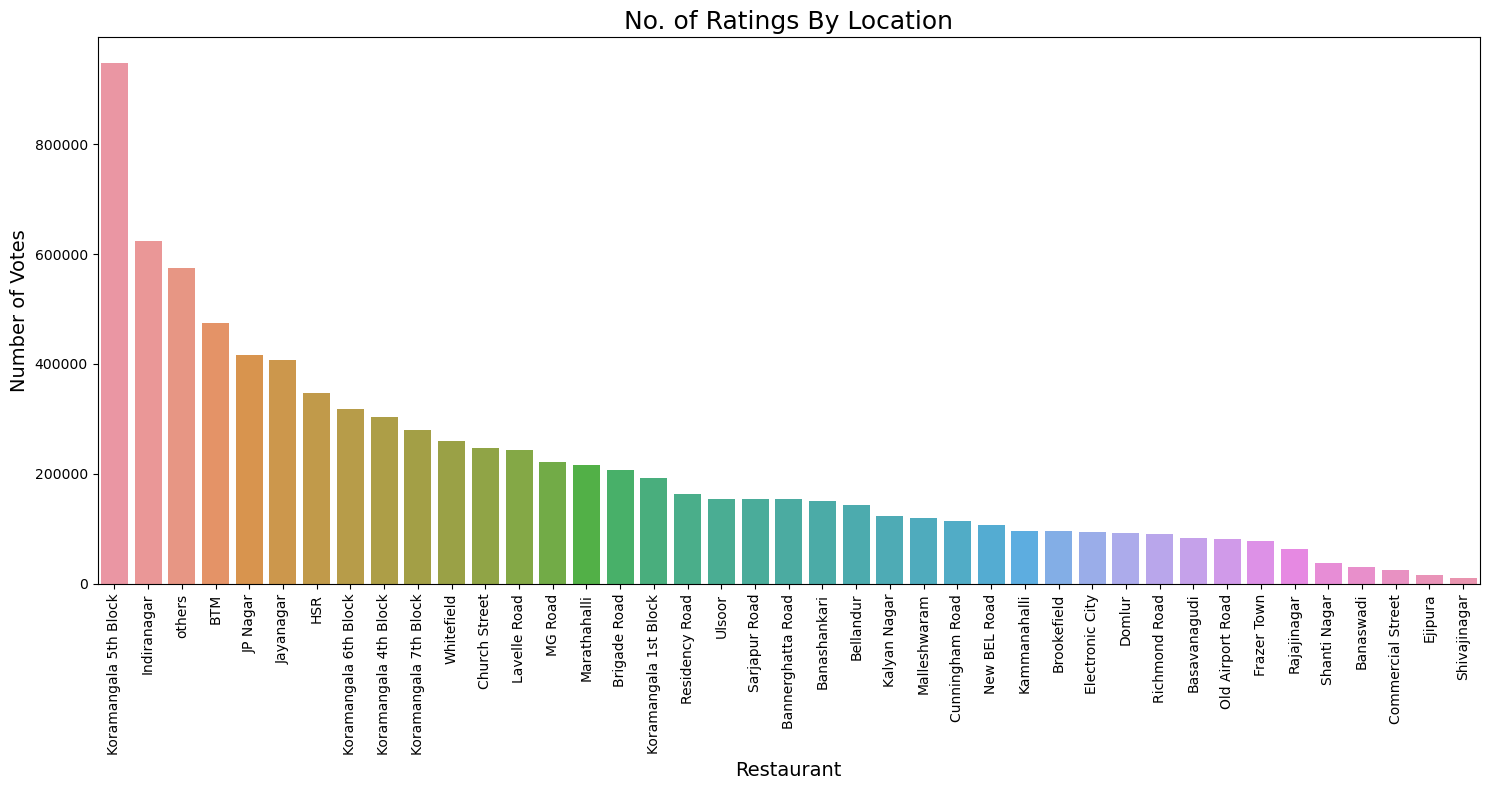

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x=df5.index, y=df5['votes'])
plt.xticks(rotation=90)
plt.xlabel('Restaurant', fontsize=14)
plt.ylabel('Number of Votes', fontsize=14)
plt.title('No. of Ratings By Location', fontsize=18)


# Increase the bottom margin to make room for the x-axis labels
plt.subplots_adjust(bottom=0.2)

# Call tight_layout to ensure all elements fit within the figure area
plt.tight_layout() 

file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'ratings_by_location.png')
                         
plt.savefig(file_path)

## Visualizing Top Cuisines

In [99]:
df6 = df[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7.head()

,votes
cuisines,
others,6159727
North Indian,382031
"North Indian, Chinese",226581
South Indian,107821
"North Indian, Mughlai",81915


In [100]:
# removing others from viz
df7 = df7.iloc[1:, :]
df7.head()

,votes
cuisines,
North Indian,382031
"North Indian, Chinese",226581
South Indian,107821
"North Indian, Mughlai",81915
Chinese,75126


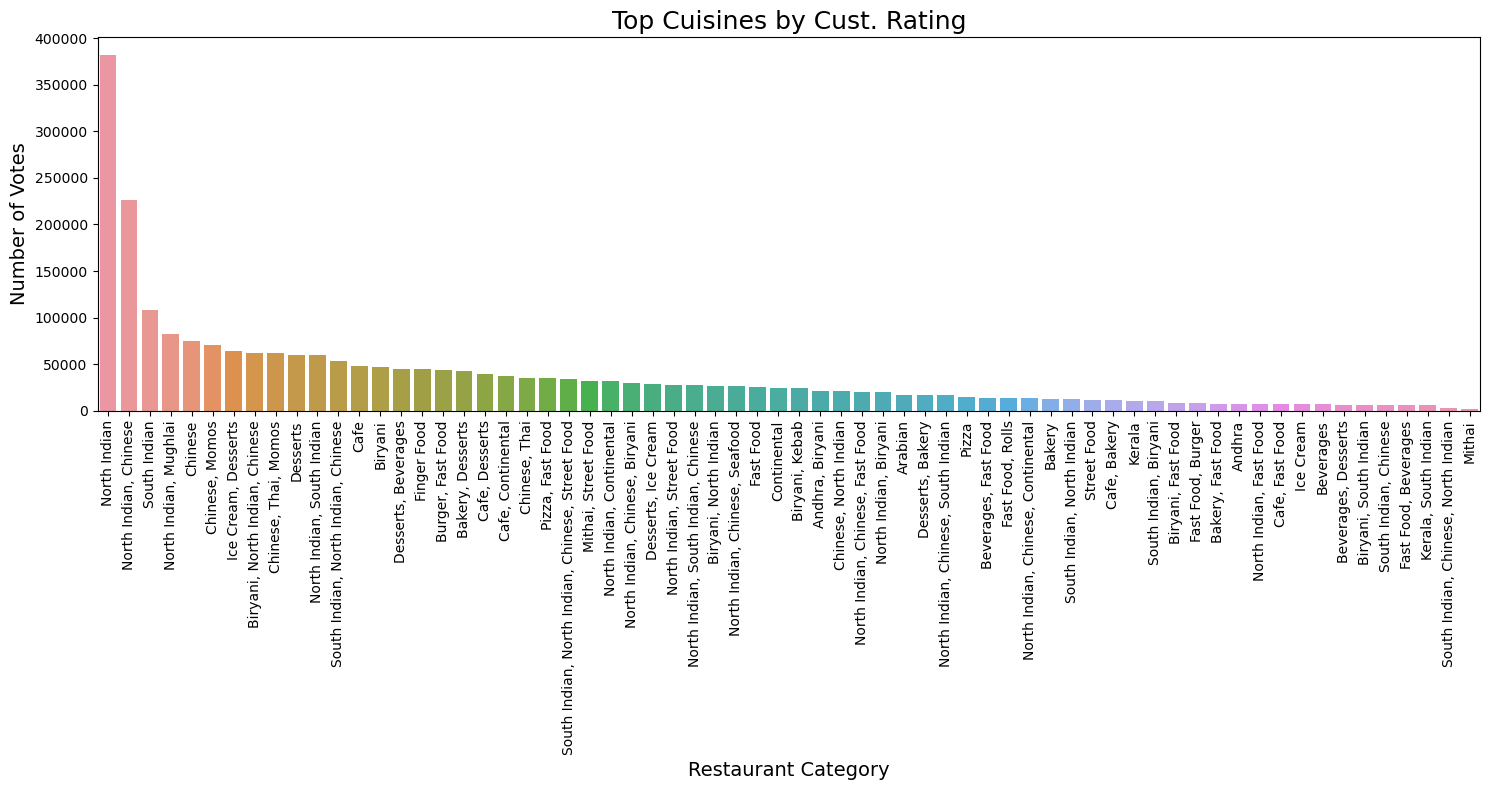

In [102]:
plt.figure(figsize=(15, 8))
sns.barplot(x=df7.index, y=df7['votes'])
plt.xticks(rotation=90)
plt.xlabel('Restaurant Category', fontsize=14)
plt.ylabel('Number of Votes', fontsize=14)
plt.title('Top Cuisines by Cust. Rating', fontsize=18)

# Increase the bottom margin to make room for the x-axis labels
plt.subplots_adjust(bottom=0.2)

# Call tight_layout to ensure all elements fit within the figure area
plt.tight_layout() 

file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'top_cuisins_by_ratings.png')
                         
plt.savefig(file_path)
